# One-way Analysis of Variance (ANOVA)
## Author: Snigdhayan Mahanta

Consider 2 or more groups of sample data. The ANOVA tests the null hypothesis that the samples in all groups are drawn from populations with identical means. I have provided a simple illustration of the one-way ANOVA test using dummy data below.

In [1]:
# Data parameters of 3 normally distributed datasets - sample size, mean and standard deviation
size <- 10000

mean1 <- 80
mean2 <- 100 
mean3 <- 120

sd1 <- 10
sd2 <- 10
sd3 <- 10

In [2]:
# Create sample dataframe with specified parameters
data1 <- rnorm(size, mean1, sd1)
data2 <- rnorm(size, mean2, sd2)
data3 <- rnorm(size, mean3, sd3)

df <- data.frame("Type_1" = data1, "Type_2" = data2, "Type_3" = data3)

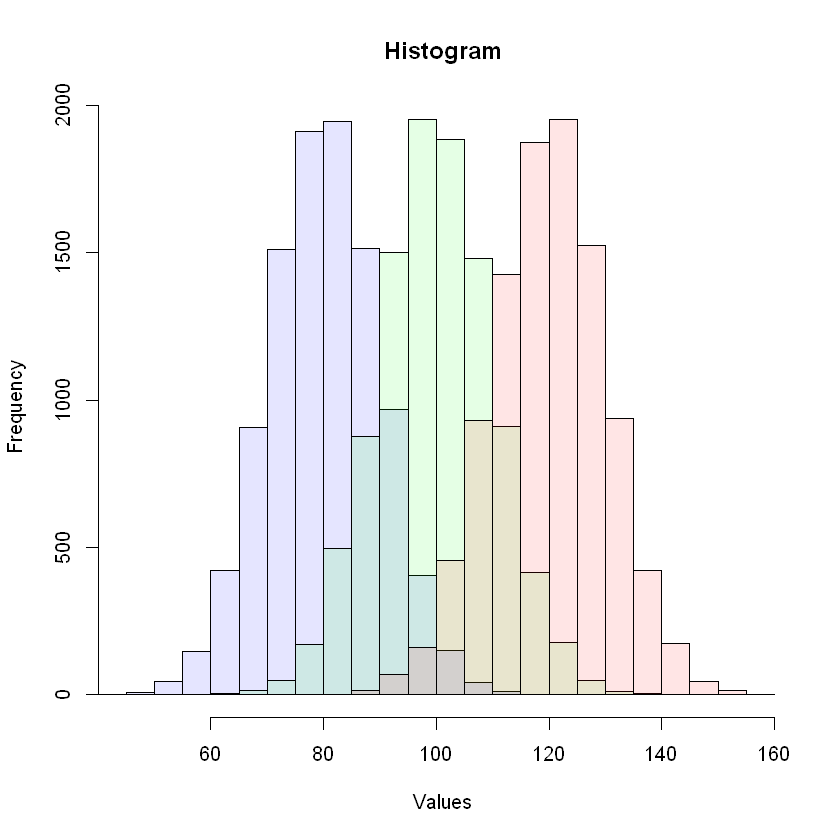

In [3]:
# Visualize the data
lower <- min(df)
upper <- max(df)

Histogram1 <- hist(df$Type_1, plot = FALSE)
Histogram2 <- hist(df$Type_2, plot = FALSE)
Histogram3 <- hist(df$Type_3, plot = FALSE)

plot(Histogram1, col = rgb(0,0,1,1/10), xlab = "Values", main = "Histogram", xlim = c(lower,upper)) 
plot(Histogram2, col = rgb(0,1,0,1/10), xlab = "Values", main = "Histogram", xlim = c(lower,upper), add = TRUE) 
plot(Histogram3, col = rgb(1,0,0,1/10), xlab = "Values", main = "Histogram", xlim = c(lower,upper), add = TRUE) 

In [4]:
# Prepare data for analysis of variance (ANOVA)
df_stack <- data.frame(stack(df[1:3]))
names(df_stack)[names(df_stack) == "values"] <- "Value"
names(df_stack)[names(df_stack) == "ind"] <- "Category"

In [5]:
# Check if the variance within individual groups are comparable
flignerTest <- fligner.test(Value ~ Category, data = df_stack)
flignerTest # if the 'p-value' exceeds significance level, then the variances are comparable


	Fligner-Killeen test of homogeneity of variances

data:  Value by Category
Fligner-Killeen:med chi-squared = 3.2978, df = 2, p-value = 0.1923


In [6]:
# Compute the analysis of variance (ANOVA)
res.aov <- aov(Value ~ Category, data = df_stack)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova # if 'Pr(>F)' falls below the significance level, then reject the null hypothesis

               Df  Sum Sq Mean Sq F value Pr(>F)    
Category        2 7986279 3993140   39904 <2e-16 ***
Residuals   29997 3001735     100                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [7]:
# Tukey test to differentiate the means if null hypothesis is rejected
TukeyTest <- TukeyHSD(res.aov)
TukeyTest # ascertain the significance of the differences between the observed means

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Value ~ Category, data = df_stack)

$Category
                  diff      lwr      upr p adj
Type_2-Type_1 19.83029 19.49872 20.16185     0
Type_3-Type_1 39.96530 39.63373 40.29686     0
Type_3-Type_2 20.13501 19.80345 20.46657     0


One can repeat the tests by changing the values of the means and standard deviations.